In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Import MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
# Print a training example
print(type(x_train))
print(x_train[0])
print(y_train[0])

<class 'numpy.ndarray'>
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 25

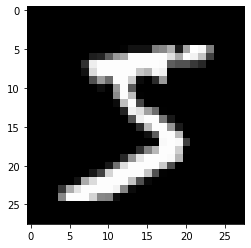

In [4]:
# Visualise image in matlab
plt.imshow(x_train[0], cmap='gray')

In [5]:
# Now let's normalise the data to between 0 and 1
x_train = x_train/255.0
x_test = x_test/255.0

In [6]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [8]:
# First thing's first, let's create a function to plot our model's performance over time. What metric should we measure?
# It's a classification problem, and let's check the class distribution we are training and testing on.

countsTrain = np.unique(y_train, return_counts=True)[1]
percentageFrequencyTrain = (countsTrain*100)/len(y_train)
print(percentageFrequencyTrain)

countsTest = np.unique(y_test, return_counts=True)[1]
percentageFrequencyTest = (countsTest*100)/len(y_test)
print(percentageFrequencyTest)

[ 9.87166667 11.23666667  9.93       10.21833333  9.73666667  9.035
  9.86333333 10.44166667  9.75166667  9.915     ]
[ 9.8  11.35 10.32 10.1   9.82  8.92  9.58 10.28  9.74 10.09]


In [27]:
# As the relative frequencies of the classes are similar, we should look at accuracy. Let's create a function to plot
# the accuracy over time.

def plot_accuracy(epochs, metrics):
    fig, ax = plt.subplots()
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Metrics')
    ax.set_title('Training Curve')
    
    for metric in metrics.columns:
        y = metrics[metric]
        ax.plot(epochs, y, label=metric)
        
    ax.legend()

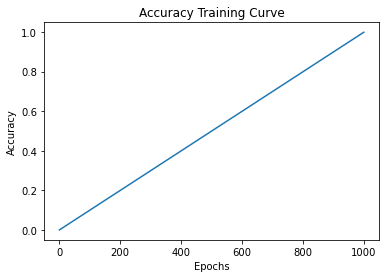

In [15]:
epochs = np.arange(1, 1001)
accuracies = np.arange(0, 1, 0.001)
plot_accuracy(epochs, accuracies)

In [16]:
# Let's train a normal DNN and see how well it works.

def create_model_DNN(learning_rate):
    
    model = tf.keras.models.Sequential()
    
    # Flatten the image into an array
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
    
    # Simple hidden layers
    model.add(tf.keras.layers.Dense(units=20, activation='relu'))
    model.add(tf.keras.layers.Dense(units=20, activation='relu'))
    
    # Output layer using softmax
    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
    
    model.compile(tf.keras.optimizers.Adam(learning_rate=learning_rate), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model

In [26]:
def train_model_DNN(model, features, labels, batch_size, epochs):
    
    history = model.fit(x=features, y=labels, batch_size=batch_size, epochs=epochs, shuffle=True)
    
    epochs = history.epoch
    metrics = pd.DataFrame(history.history)
    return epochs, metrics

Epoch 1/15
469/469 [==============================] - 1s 2ms/step - loss: 0.3612 - accuracy: 0.8893
Epoch 2/15
469/469 [==============================] - 1s 3ms/step - loss: 0.2145 - accuracy: 0.9363
Epoch 3/15
469/469 [==============================] - 1s 3ms/step - loss: 0.1866 - accuracy: 0.9452
Epoch 4/15
469/469 [==============================] - 1s 3ms/step - loss: 0.1744 - accuracy: 0.9471
Epoch 5/15
469/469 [==============================] - 1s 3ms/step - loss: 0.1647 - accuracy: 0.9503
Epoch 6/15
469/469 [==============================] - 2s 3ms/step - loss: 0.1554 - accuracy: 0.9525
Epoch 7/15
469/469 [==============================] - 1s 3ms/step - loss: 0.1513 - accuracy: 0.9549
Epoch 8/15
469/469 [==============================] - 1s 3ms/step - loss: 0.1470 - accuracy: 0.9548: 0s - loss: 0.1468 - 
Epoch 9/15
469/469 [==============================] - 1s 3ms/step - loss: 0.1405 - accuracy: 0.9564
Epoch 10/15
469/469 [==============================] - 1s 3ms/step - loss: 0.1

[0.1980484127998352, 0.9496999979019165]

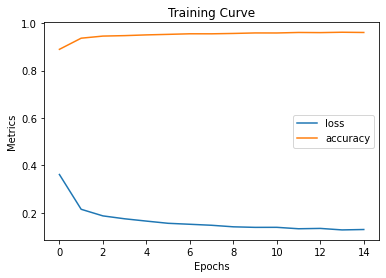

In [28]:
learning_rate = 0.01
batch_size = 128
epochs = 15

# Create and train model
model = create_model_DNN(learning_rate)
epochs, accuracies = train_model_DNN(model, x_train, y_train, batch_size, epochs)
plot_accuracy(epochs, accuracies)

# Evaluate model
model.evaluate(x=x_test, y=y_test, batch_size=batch_size)